In [1]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keplergl import KeplerGl as kepler
import geopandas as gpd
from datetime import datetime as dt
from IPython.display import display
pd.set_option('display.max_columns', None)

In [2]:
acled_connection = pymysql.connect("database-final.clg6rizqii1v.us-east-1.rds.amazonaws.com", "admin",
                                  "Coronavirus", "acled")

In [3]:
gdelt_connection = pymysql.connect("database-final.clg6rizqii1v.us-east-1.rds.amazonaws.com", "admin",
                                  "Coronavirus", "gdelt")

In [4]:
acled_cursor = acled_connection.cursor()
gdelt_cursor = gdelt_connection.cursor()

In [5]:
show_tables = 'SHOW TABLES'

In [6]:
pd.read_sql(show_tables, acled_connection)

,Tables_in_acled
0,events


In [7]:
pd.read_sql(show_tables, gdelt_connection)

,Tables_in_gdelt
0,events_2013
1,events_2014
2,events_2015
3,events_2016
4,events_2017
5,events_2018
6,events_2019
7,events_2020
8,us_2019
9,usaf_2019


In [8]:
pd.read_sql("SELECT COUNT(GLOBALEVENTID) FROM us_2019", gdelt_connection)

,COUNT(GLOBALEVENTID)
0,16660601


In [9]:
usaf_2019 = pd.DataFrame(pd.read_sql("SELECT * FROM usaf_2019", gdelt_connection))

In [10]:
len(usaf_2019)

31207

In [11]:
usaf_2019.head()

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,Actor1Religion1Code,Actor1Religion2Code,Actor1Type1Code,Actor1Type2Code,Actor1Type3Code,Actor2Code,Actor2Name,Actor2CountryCode,Actor2KnownGroupCode,Actor2EthnicCode,Actor2Religion1Code,Actor2Religion2Code,Actor2Type1Code,Actor2Type2Code,Actor2Type3Code,IsRootEvent,EventCode,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,Actor1Geo_Type,Actor1Geo_FullName,Actor1Geo_CountryCode,Actor1Geo_ADM1Code,Actor1Geo_Lat,Actor1Geo_Long,Actor1Geo_FeatureID,Actor2Geo_Type,Actor2Geo_FullName,Actor2Geo_CountryCode,Actor2Geo_ADM1Code,Actor2Geo_Lat,Actor2Geo_Long,Actor2Geo_FeatureID,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,813418688,2019-01-01,201901,2019,2019.0,AFGINSTAL,TALIBAN,AFG,TAL,,,,INS,,,AFG,AFGHANISTAN,AFG,,,,,,,,0,125,125,12,3,-5.0,9,2,9,-1.05164,3,"White House, District of Columbia, United States",US,USDC,38.8951,-77.0364,531871,4,"Kabul, Kabol, Afghanistan",AF,AF13,34.5167,69.1833,-3378435,4,"Kabul, Kabol, Afghanistan",AF,AF13,34.5167,69.1833,-3378435,2019-01-01,http://worldtribunepakistan.com/2019/01/01/afg...
1,813418689,2019-01-01,201901,2019,2019.0,AFGINSTAL,TALIBAN,AFG,TAL,,,,INS,,,AFG,AFGHANISTAN,AFG,,,,,,,,0,125,125,12,3,-5.0,3,2,3,-1.05164,3,"White House, District of Columbia, United States",US,USDC,38.8951,-77.0364,531871,4,"Kabul, Kabol, Afghanistan",AF,AF13,34.5167,69.1833,-3378435,1,United Arab Emirates,AE,AE,24.0000,54.0000,AE,2019-01-01,http://worldtribunepakistan.com/2019/01/01/afg...
2,813420121,2019-01-01,201901,2019,2019.0,USA,UNITED STATES,USA,,,,,,,,AFG,AFGHANISTAN,AFG,,,,,,,,1,874,87,8,2,10.0,104,49,104,-1.48412,2,"Washington, United States",US,USWA,47.3917,-121.5710,WA,1,Afghanistan,AF,AF,33.0000,66.0000,AF,1,Afghanistan,AF,AF,33.0000,66.0000,AF,2019-01-01,https://www.thedailytimes.com/news/nation_worl...
3,813424539,2019-01-01,201901,2019,2019.0,USAGOV,US OFFICIAL,USA,,,,,GOV,,,SAU,SAUDI ARABIA,SAU,,,,,,,,1,36,36,3,1,4.0,3,1,3,-2.98477,1,United States,US,US,39.8282,-98.5795,US,4,"Kabul, Kabol, Afghanistan",AF,AF13,34.5167,69.1833,-3378435,4,"Kabul, Kabol, Afghanistan",AF,AF13,34.5167,69.1833,-3378435,2019-01-01,https://www.thenews.com.pk/print/413056-obl-pr...
4,813428162,2019-01-01,201901,2019,2019.0,RAD,EXTREMIST,,,,,,RAD,,,AFG,AFGHANISTAN,AFG,,,,,,,,1,874,87,8,2,10.0,10,1,10,-3.57143,1,United States,US,US,39.8282,-98.5795,US,1,Afghanistan,AF,AF,33.0000,66.0000,AF,1,United States,US,US,39.8282,-98.5795,US,2019-01-01,https://www.straitstimes.com/opinion/the-globa...


In [12]:
usaf_2019['MonthYear'] = usaf_2019['MonthYear'].astype(str)

In [13]:
usaf_2019['month'] = [str(x)[-2:] for x in usaf_2019['MonthYear'].astype(int)]

In [14]:
usaf_avg_2019 = pd.DataFrame(usaf_2019.groupby('month')['GoldsteinScale'].mean()).reset_index()

In [15]:
usaf_avg_2019

,month,GoldsteinScale
0,01,1.575112
1,02,2.406136
2,03,0.933192
3,04,-0.029895
4,05,0.475676
5,06,0.009797
6,07,0.902838
7,08,0.919977
8,09,0.694420
9,10,0.394406


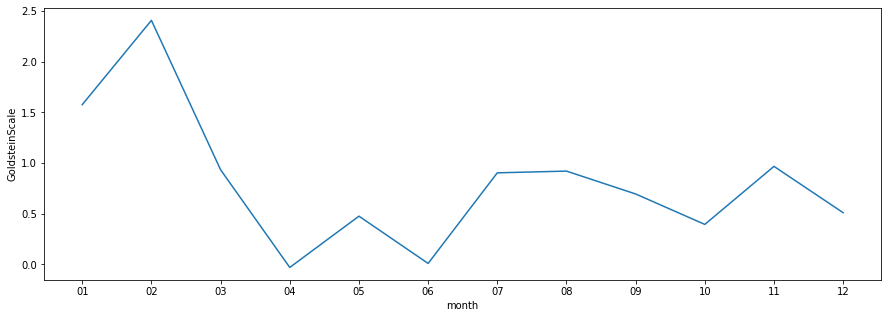

In [16]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(x='month', y="GoldsteinScale", data=usaf_avg_2019)

In [17]:
usaf_2019['Actor1Name'].unique()

array(['TALIBAN', 'UNITED STATES', 'US OFFICIAL', 'EXTREMIST',
       'TERRORIST', 'COLORADO', 'MONTANA', 'DENVER', 'GOVERNMENT',
       'THE WHITE HOUSE', 'REPRESENTATIVES', 'AMERICAN', 'MAINE',
       'AFGHAN', 'PAKISTAN', 'SAUDI ARABIA', 'KABUL', 'THE US',
       'PRESIDENT', 'IRAN', 'WASHINGTON', 'NATO', 'AFGHANISTAN',
       'DEFENSE SECRETARY', 'TEXAS', 'MEDIA', 'HILLARY CLINTON',
       'COMMANDER', 'CALIFORNIA', 'PENNSYLVANIA', 'RUSSIA', 'FLORIDA',
       'EMBASSY', 'NEW YORK', 'JOURNALIST', 'CABINET', 'IRAQ', 'SYRIA',
       'A CABINET MEETING', 'CONGRESS', 'ASSOCIATED PRESS',
       'AMERICAN TROOPS', 'SOUTH CAROLINA', 'MASSACHUSETTS',
       'ADMINISTRATION', 'CHINA', 'UNITED NATIONS',
       'FOREIGN AFFAIRS MINIST', 'MISSISSIPPI', 'GUNMAN', 'SENATE',
       'BORDER SECURITY', 'VIETNAM', 'UTAH', 'JAPAN', 'SOUTH KOREA',
       'OSAMA BIN LADEN', 'SENATOR', 'NEW DELHI', 'SCHOOL', 'EUROPEAN',
       'MAIN OPPOSITION', 'BOSTON', 'SOUTH ASIA', 'ISTANBUL',
       'RHODE ISLAND', 

In [18]:
taliban_2019 = usaf_2019[(usaf_2019['Actor1Name'] == 'TALIBAN') | (usaf_2019['Actor2Name'] == 'TALIBAN')]

In [19]:
len(taliban_2019)

6299

In [20]:
taliban_avg_2019 = pd.DataFrame(taliban_2019.groupby('month')['GoldsteinScale'].mean()).reset_index()

In [21]:
taliban_avg_2019['month'] = taliban_avg_2019['month'].astype(int)

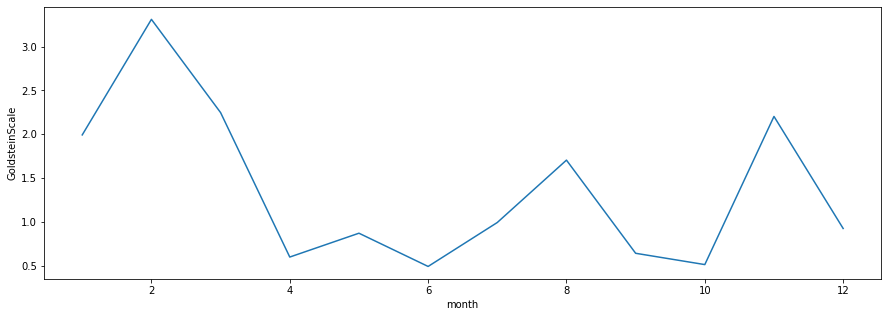

In [22]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(x='month', y="GoldsteinScale", data=taliban_avg_2019)

In [ ]:
# ACLED

In [23]:
pd.read_sql("SELECT COUNT(*) FROM events", acled_connection)

,COUNT(*)
0,745515


In [24]:
acled_af_2019 = pd.DataFrame(pd.read_sql("SELECT * FROM events WHERE year = 2019 AND country = 'Afghanistan'",
                                         acled_connection))

In [25]:
len(acled_af_2019)

13918

In [26]:
acled_af_2019.head()

,data_id,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
0,4,AFG15843,15843,01-January-2019,2019,1,Battles,Armed clash,Military Forces of Afghanistan (2014-),,1,Taliban,,2,12,Caucasus and Central Asia,Afghanistan,Faryab,Shirin Tagab,,Islam Qala,36.214,64.866,1,Bakhtar News Agency,National,"""On 01-January-2019",10,0
1,4,AFG15844,15844,01-January-2019,2019,2,Explosions/Remote violence,Air/drone strike,Military Forces of Afghanistan (2014-),,1,Unidentified Armed Group (Afghanistan),,3,13,Caucasus and Central Asia,Afghanistan,Urozgan,Tarinkot,,Tarinkot,32.627,65.873,1,Bakhtar News Agency,National,"""On 01-January-2019",0,6
2,4,AFG18177,18177,01-January-2019,2019,1,Explosions/Remote violence,Shelling/artillery/missile attack,Taliban,,2,NATO: North Atlantic Treaty Organization,Military Forces of United States,8,28,Caucasus and Central Asia,Afghanistan,Kabul,Kabul,,Kabul,34.517,69.183,1,Voice of Jihad,Other,"""On 01-January-2019",0,0
3,4,AFG18197,18197,01-January-2019,2019,1,Battles,Armed clash,Taliban,,2,Militia (Pro-Government),,3,23,Caucasus and Central Asia,Afghanistan,Nuristan,Wama,,Wama,35.120,70.745,2,Voice of Jihad,Other,"""On 01-January-2019",4,0
4,4,AFG18370,18370,01-January-2019,2019,1,Battles,Armed clash,Taliban,,2,Militia (Pro-Government),,3,23,Caucasus and Central Asia,Afghanistan,Badakhshan,Raghistan,,Ziraki,37.592,70.558,2,Voice of Jihad,Other,"""On 01-January-2019",2,0


In [27]:
acled_af_2019['event_date'] = [dt.strptime(x, '%d-%B-%Y') for x in acled_af_2019['event_date']]

In [28]:
acled_af_2019['month'] = [x.month for x in acled_af_2019['event_date']]

In [29]:
acled_af_2019['month'] = acled_af_2019['month'].astype(int)

In [30]:
monthly_fatalities = pd.DataFrame(acled_af_2019.groupby(['month'])['fatalities'].sum()).reset_index()

In [31]:
monthly_fatalities

,month,fatalities
0,1,2711
1,2,2481
2,3,2698
3,4,5759
4,5,3334
5,6,1573
6,7,2345
7,8,437
8,9,4026
9,10,1086


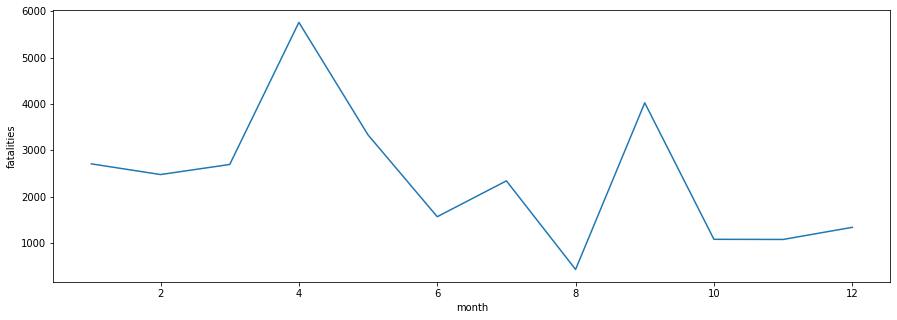

In [32]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(x='month', y="fatalities", data=monthly_fatalities)

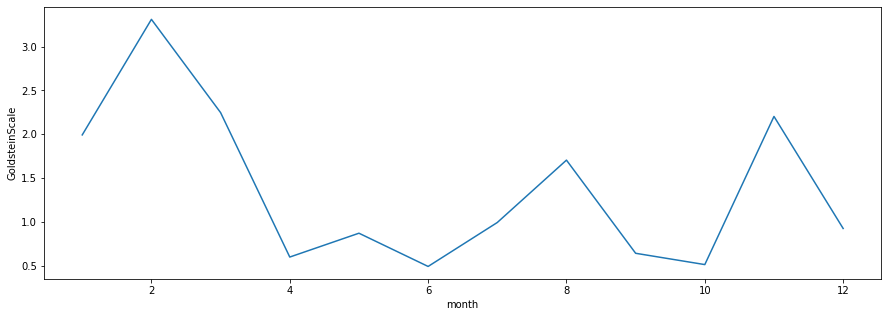

In [33]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(x='month', y="GoldsteinScale", data=taliban_avg_2019)

In [34]:
df = pd.merge(taliban_avg_2019, monthly_fatalities, on='month')

In [35]:
df

,month,GoldsteinScale,fatalities
0,1,1.991778,2711
1,2,3.310672,2481
2,3,2.246361,2698
3,4,0.597698,5759
4,5,0.869817,3334
5,6,0.490476,1573
6,7,0.992034,2345
7,8,1.703952,437
8,9,0.640762,4026
9,10,0.511698,1086


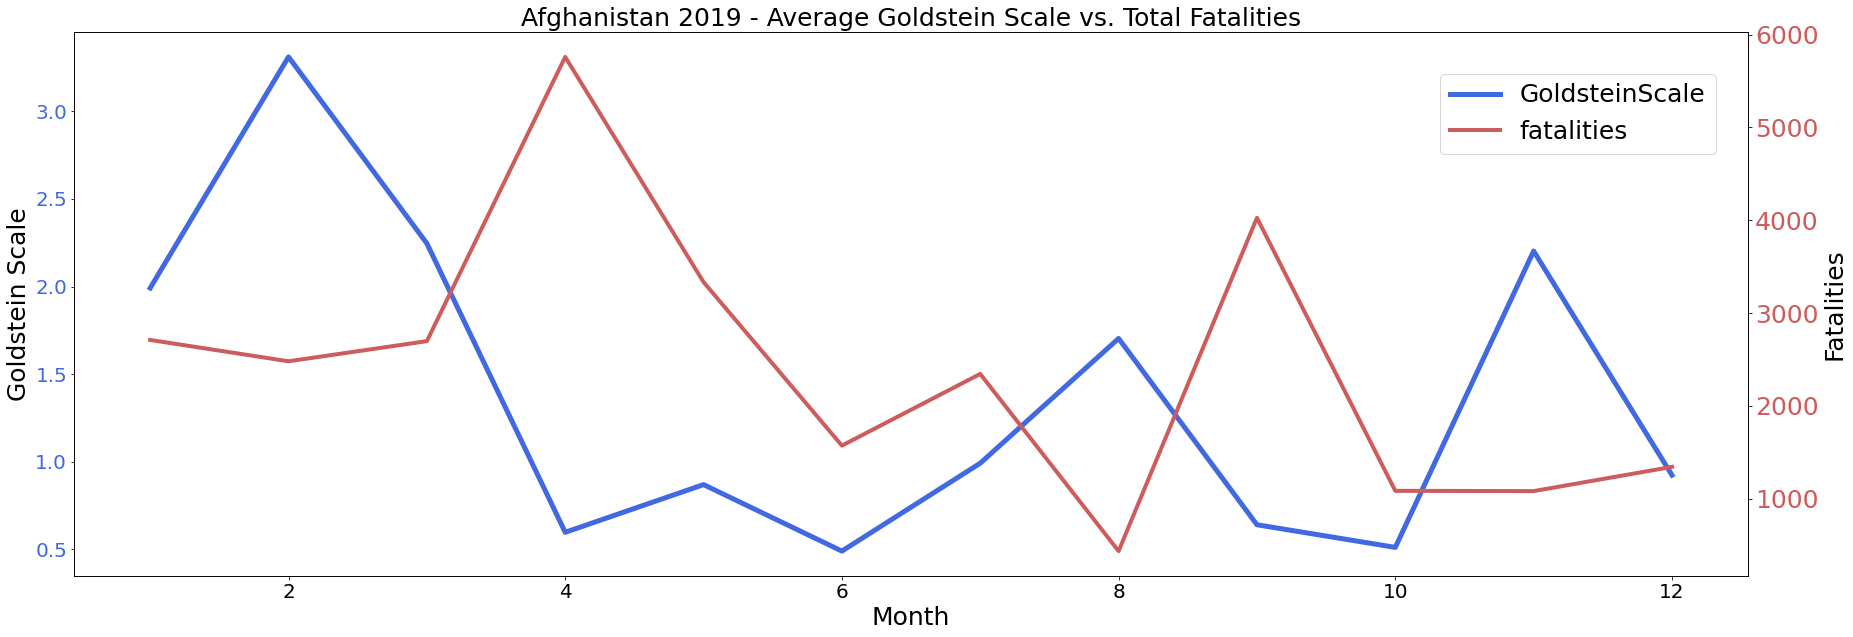

In [36]:
ax = df.plot(x="month", y="GoldsteinScale", legend=False, linewidth=5, 
             fontsize=20, color="royalblue")
ax.set_ylabel('Goldstein Scale', fontsize=25)
ax.set_xlabel('Month', fontsize=25)
ax.tick_params(axis='y', labelcolor='royalblue')

ax2 = ax.twinx()
ax2.set_ylabel('Fatalities', fontsize=25)
ax2.tick_params(axis='y', labelcolor='indianred')

df.plot(x="month", y="fatalities", ax=ax2, legend=False, color="indianred", figsize=(30, 10), linewidth=4, fontsize=25)
ax.figure.legend(fontsize=25, bbox_to_anchor=(0.80,0.80))
plt.title('Afghanistan 2019 - Average Goldstein Scale vs. Total Fatalities', fontsize=25)
plt.show()

In [38]:
map = kepler(height=600, width=500)

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


In [39]:
map

KeplerGl(height=600)

In [ ]:
config = {'version': 'v1',
 'config': {'visState': {'filters': [{'dataId': 'unnamed',
     'id': 'fwdx0sgpo',
     'name': 'event_date',
     'type': 'timeRange',
     'value': [1546300800000, 1577750400000],
     'enlarged': True,
     'plotType': 'histogram',
     'yAxis': None}],
   'layers': [{'id': 'n7xv4w',
     'type': 'heatmap',
     'config': {'dataId': 'unnamed',
      'label': 'Events Heat Map',
      'color': [18, 147, 154],
      'columns': {'lat': 'latitude', 'lng': 'longitude'},
      'isVisible': True,
      'visConfig': {'opacity': 0.8,
       'colorRange': {'name': 'ColorBrewer RdYlBu-6',
        'type': 'diverging',
        'category': 'ColorBrewer',
        'colors': ['#4575b4',
         '#91bfdb',
         '#e0f3f8',
         '#fee090',
         '#fc8d59',
         '#d73027'],
        'reversed': True},
       'radius': 10},
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'weightField': None, 'weightScale': 'linear'}},
    {'id': 'vvnj6v',
     'type': 'hexagon',
     'config': {'dataId': 'unnamed',
      'label': 'Fatalities',
      'color': [23, 184, 190],
      'columns': {'lat': 'latitude', 'lng': 'longitude'},
      'isVisible': False,
      'visConfig': {'opacity': 0.8,
       'worldUnitSize': 19.0412,
       'resolution': 8,
       'colorRange': {'name': 'Sunrise 6',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#355C7D',
         '#63617F',
         '#916681',
         '#D88185',
         '#E8998D',
         '#F8B195']},
       'coverage': 1,
       'sizeRange': [0, 500],
       'percentile': [0, 100],
       'elevationPercentile': [0, 100],
       'elevationScale': 24.8,
       'colorAggregation': 'average',
       'sizeAggregation': 'average',
       'enable3d': True},
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': {'name': 'fatalities',
       'type': 'integer'},
      'colorScale': 'quantile',
      'sizeField': {'name': 'fatalities', 'type': 'integer'},
      'sizeScale': 'linear'}}],
   'interactionConfig': {'tooltip': {'fieldsToShow': {'unnamed': ['data_id',
       'event_id_cnty',
       'event_id_no_cnty',
       'event_date',
       'year']},
     'enabled': True},
    'brush': {'size': 0.5, 'enabled': False}},
   'layerBlending': 'normal',
   'splitMaps': [],
   'animationConfig': {'currentTime': None, 'speed': 1}},
  'mapState': {'bearing': 0,
   'dragRotate': False,
   'latitude': 31.25767398442732,
   'longitude': 63.156501533428255,
   'pitch': 0,
   'zoom': 4.393810792814765,
   'isSplit': False},
  'mapStyle': {'styleType': 'dark',
   'topLayerGroups': {},
   'visibleLayerGroups': {'label': True,
    'road': True,
    'border': False,
    'building': True,
    'water': True,
    'land': True,
    '3d building': False},
   'threeDBuildingColor': [9.665468314072013,
    17.18305478057247,
    31.1442867897876],
   'mapStyles': {}}}}

In [40]:
map.add_data(acled_af_2019)
map.config = config